In [1]:
import os
from datetime import datetime, timedelta
from pathlib import Path
from utils.atc_pipeline import RecordingSession, download_archive_audio, download_adsb, transcribe_audio, process_sessions 
from utils.liveatc_utils import get_stations, is_enroute_frequency

In [15]:
from traffic.data import eurofirs, airports

In [10]:
eurofirs

,geometry,designator,name,type,upper,lower,latitude,longitude
0,"POLYGON ((6.19247 49.96404, 6.19404 49.96043, ...",EBBU,BRUSSELS FIR,FIR,195.0,0.0,50.628406,4.600560
1,"POLYGON ((6.9056 45.67116, 6.90687 45.67508, 6...",LIMM,MILANO FIR,FIR,195.0,0.0,45.030624,10.499386
2,"POLYGON ((6.12122 46.25472, 6.12454 46.25131, ...",LFMM,MARSEILLE FIR,FIR,195.0,0.0,42.845677,5.925558
3,"POLYGON ((-13 45, -13 43, -15 42, -15 36.5, -1...",LPPO,SANTA MARIA OCEANIC FIR,FIR,inf,0.0,34.190600,-29.363399
4,"POLYGON ((30.56583 51.30833, 30.56722 51.31389...",UKBV,KYIV FIR,FIR,275.0,0.0,50.086590,30.888969
5,"POLYGON ((-8 51, -8.4375 51, -8.875 51, -9.312...",EISN,SHANNON FIR,FIR,245.0,0.0,52.808556,-10.369671
6,"POLYGON ((26.24694 57.63667, 26.24056 57.63417...",EVRR,RIGA FIR,FIR,inf,0.0,56.964206,23.739986
7,"POLYGON ((36.595 45.245, 36.53333 45.205, 36.5...",UKFV,SIMFEROPOL' FIR,FIR,275.0,0.0,44.852772,33.895004
8,"POLYGON ((28.71833 45.79639, 28.71333 45.80639...",UKOV,ODESA FIR,FIR,275.0,0.0,46.610638,30.878332
9,"POLYGON ((34.54333 32.77667, 34.56167 32.86333...",LLLL,TEL AVIV FIR,FIR,inf,0.0,31.698778,34.862295


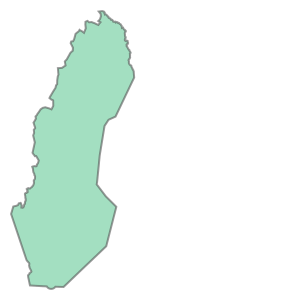

In [4]:
eurofirs["ESAA"]

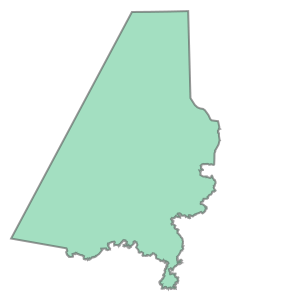

In [11]:
eurofirs["EHAA"]

Several feeds for the same frequency: 
- Same frequency but from different locations/recievers
- Feeds are dupplicated in case of failure
- ARTCC sectors often share frequencies across multiple adjacent areas
- A single feed might monitor several frequencies

Frequences for Sweden (FIR = ESAA):
- ESMS radar
- ESSL (airport + radar)
- ESSP (airport + radar)
- ESSD (airport + radar)

In [19]:
stations = get_stations("EHAM")

for station in stations:
  # enroute_freqs = [f for f in station['frequencies'] if is_enroute_frequency(f)]
  enroute_freqs = [f for f in station['frequencies']]
  if enroute_freqs and station["up"]:
    print(f"[{station['identifier']}] - {station['title']}")
    for freq in enroute_freqs:
        print(f"\t{freq['title']} - {freq['frequency']}")

[ehle_dutchmil] - Dutch Mil Radar
	Approach - 124.530
	Dutch Mil Flight Info - 264.325
	Dutch Mil Radar - 128.355
	Dutch Mil Radar - 132.350
[eham_rdr_124230] - EHAA Radar (124.230)
	EHAA Radar - 124.230
[eham_rdr_120555] - EHAA Radar ARTIP
	EHAA Radar Sector 1 ARTIP - 120.555
[eham_rdr_e_out] - EHAA Radar East Outbound
	EHAA Radar Sector 2 East Outbound - 124.880
[eham_rdr_nw] - EHAA Radar Northwest
	EHAA Radar Sector 5 Northwest - 123.705
[eham_rdr_127780] - EHAA Radar RIVER
	Amsterdam Radar ACC Arrivals via holding RIVER - 127.780
[eham_rdr_s] - EHAA Radar South
	EHAA Radar Sector 3 South - 123.855
[eham_rdr_118805] - EHAA Radar SUGOL
	EHAA Radar Sector 5 SUGOL - 118.805
[eham_app_118080] - EHAM App/Dep (118.080)
	Schiphol Approach/Departure - 118.080
[eham_app_119055] - EHAM App/Dep (119.055)
	Schiphol Approach/Departure - 119.055
[eham_app_121205] - EHAM App/Dep (121.205)
	Schiphol Approach/Departure - 121.205
[eham_apron_n] - EHAM Apron Control (North)
	Schiphol Apron Control (No

In [20]:
session = RecordingSession(
    start_time=datetime(2025, 7, 29, 10, 0),
    end_time=datetime(2025, 7, 29, 10, 30),
    audio_path=Path(),  # placeholder
    artcc="EHAA",
    # airport="ESSL",
    channel="eham_rdr_124230",  
)
session = download_archive_audio(session)
session = download_adsb(session)
session = transcribe_audio(session)

[audio] Downloading from https://archive.liveatc.net/eham/EHAA-Radar-124230-Jul-29-2025-1000Z.mp3
[audio] Download successful: audio/EHAA-Radar-124230-Jul-29-2025-1000Z.mp3
[adsb] Ignoring 'half_side_nm' since ARTCC bounds are defined by airspace.bounds


RUNNING: : 78.3% [00:11, 6.90%/s]
DOWNLOAD: 540klines [01:50, 4.90klines/s]


[adsb] Saved 550 records to adsb/EHAA-eham_rdr_124230-Jul-29-2025-1000Z.parquet
[vad] Saved chunk 1: chunks/EHAA-eham_rdr_124230-Jul-29-2025-1000Z/speech_000.wav
[vad] Saved chunk 2: chunks/EHAA-eham_rdr_124230-Jul-29-2025-1000Z/speech_001.wav
[vad] Saved chunk 3: chunks/EHAA-eham_rdr_124230-Jul-29-2025-1000Z/speech_002.wav
[vad] Saved chunk 4: chunks/EHAA-eham_rdr_124230-Jul-29-2025-1000Z/speech_003.wav
[vad] Saved chunk 5: chunks/EHAA-eham_rdr_124230-Jul-29-2025-1000Z/speech_004.wav
[vad] Saved chunk 6: chunks/EHAA-eham_rdr_124230-Jul-29-2025-1000Z/speech_005.wav
[vad] Saved chunk 7: chunks/EHAA-eham_rdr_124230-Jul-29-2025-1000Z/speech_006.wav
[vad] Saved chunk 8: chunks/EHAA-eham_rdr_124230-Jul-29-2025-1000Z/speech_007.wav
[vad] Saved chunk 9: chunks/EHAA-eham_rdr_124230-Jul-29-2025-1000Z/speech_008.wav
[vad] Saved chunk 10: chunks/EHAA-eham_rdr_124230-Jul-29-2025-1000Z/speech_009.wav
[vad] Saved chunk 11: chunks/EHAA-eham_rdr_124230-Jul-29-2025-1000Z/speech_010.wav
[vad] Saved chun

In [ ]:
# icao = "EPWA"
# station = "epwa_app"
# start = datetime(2025, 6, 27, 9, 0)
# duration = timedelta(minutes=30)
# nb_periods = 20

# recordings = []
# for i in range(nb_periods):
#     session = RecordingSession(
#             airport=icao,
#             channel=station,
#             start_time=start + i*duration,
#             end_time=start + (i+1)*duration,
#             audio_path=Path()
#         )
#     recordings.append(session)

In [ ]:
# process_sessions(recordings)